In [1]:
import gspread
from oauth2client.service_account import ServiceAccountCredentials
from gspread_formatting import *

from collections import Counter
import numpy as np
import time
import pandas as pd

import datetime as dt

import matplotlib.pyplot as plt
import matplotlib.patheffects as path_effects
from matplotlib import ticker
from matplotlib.ticker import MaxNLocator

from matplotlib.gridspec import GridSpec
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import itertools as it

plt.rcParams['figure.facecolor'] = 'white'
plt.rcParams['axes.facecolor']='white'
plt.rcParams['savefig.facecolor']='white'
plt.rc('axes', axisbelow=True)
%matplotlib inline

In [2]:
relabel_cols = {'24/7 Congregate Settings':'Congregate Settings',
 'Alcohol and Drug Treatment':'Congregate Settings',
 'Apartment Complexes':'Congregate Settings',
 'Assembly Locations':'Industrial Settings',
 'Automotive/Dealership':'Other Workplaces',
 'Bar':'Bars',
 'Bars':'Bars',
 'Behavioral/Mental Health Facility':'Congregate Settings',
 'Camp':'Organized Athletics/Camps',
 'Camp -not sports camp':'Organized Athletics/Camps',
 'Casino':'Casino',
 'Child Care':'Childcare & Pre-Schools',
 'Child Daycare':'Childcare & Pre-Schools',
 'Church/Temple/Religious Location':'Religious Services/Event',
 'College/University':'Higher Education',
 'Colleges & Universities':'Higher Education',
 'Community Event':'Social/Community Setting',
 'Construction Business':'Construction Settings',
 'Construction Site':'Construction Settings',
 'Correctional Facility':'Correctional Facility',
 'Corrections':'Correctional Facility',
 'Day Care - Adult':'Congregate Settings',
 'Day Care - Child':'Childcare & Pre-Schools',
 'Factory/Manufacturer':'Industrial Settings',
 'Farm Related Business':'Food Production Facility',
 'Festival/Fair':'Social/Community Setting',
 'First Responder Workplaces':'Healthcare',
 'Food Processing':'Food Production Facility',
 'Food Production Facility':'Food Production Facility',
 'Funeral':'Social/Community Setting',
 'Group Home':'Congregate Settings',
 'Gym/Fitness Setting':'Gym/Fitness Setting',
 'Gym/Fitness/Dance Facility':'Gym/Fitness Setting',
 'Home Gathering':'Social/Community Setting',
 'Hospice/Home Health':'Healthcare',
 'Hospital':'Healthcare',
 'Hospitals':'Healthcare',
 'Hotel/Motel':'Travel/Transit',
 'Household':'Household',
 'Industrial Setting':'Industrial Settings',
 'Industrial Settings':'Industrial Settings',
 'K-12 Schools':'K-12 Schools',
 'Long Term Care Facilities':'Congregate Settings',
 'Mass Transit (airplane, bus, train, etc)':'Travel/Transit',
 'Medical Clinic/Dental Office':'Healthcare',
 'Migrant Farm Camp':'Food Production Facility',
 'Military Facility':'Industrial Settings',
 'Office Setting':'Office Setting',
 'Office Space':'Office Setting',
 'Offices':'Office Setting',
 'Organized Athletics/Camps':'Organized Athletics/Camps',
 'Other':'Other',
 'Other Food Establishments':'Restaurants & Other Food Establishments',
 'Other Healthcare':'Healthcare',
 'Other Workplaces':'Other Workplaces',
 'Other Worksite':'Other Workplaces',
 'Personal Services':'Other',
 'Places of Worship':'Religious Services/Event',
 'Pre-School':'Childcare & Pre-Schools',
 'Primary/Secondary School':'K-12 Schools',
 'Recreation':'Social/Community Setting',
 'Recreation/Cultural':'Social/Community Setting',
 'Religious Services/Event':'Religious Services/Event',
 'Restaurant':'Restaurants & Other Food Establishments',
 'Restaurants & Food Courts':'Restaurants & Other Food Establishments',
 'Retail & Services':'Retail Setting',
 'Retail Setting':'Retail Setting',
 'Retail/Sales':'Retail Setting',
 'Senior Living':'Senior Living',
 'Senior/Independent Living Facilities/Housing':'Senior Living',
 'Shelter, Homeless':'Shelters',
 'Sheltered Care Facility':'Shelters',
 'Shelters':'Shelters',
 'Ship/Boat':'Travel/Transit',
 'Short-term Rehabilitation Facility':'Congregate Settings',
 'Social Event':'Social/Community Setting',
 'Social Gatherings':'Social/Community Setting',
 'Sports Team - Not School Associated':'Organized Athletics/Camps',
 'Transitional Facility - not correctional':'Congregate Settings',
 'Travel & Lodging':'Travel/Transit',
 'Vocational School':'Higher Education',
 'Warehouse/Distribution Centers':'Other Workplaces',
 'Wedding':'Social/Community Setting',
 'Workplace':'Other Workplaces',
'Adult Sports Club/Team':"Organized Athletics/Camps",
 'Agriculture - Other':"Food Production Facility",
 'Banquet Facility':"Social/Community Setting",
 'Bar/Tavern/Brewery':"Bars",
 'Casino':"Casino",
 'Caterer':"Social/Community Setting",
 'Child Care Center':"Childcare & Pre-Schools",
 'College/University':"Higher Education",
 'Construction Company/Contractor':"Construction Settings",
 'Construction Site':"Construction Settings",
 'Convenience/Corner Store':"Retail Setting",
 'Correctional, Other':"Correctional Facility",
 'Day Camp':"Organized Athletics/Camps",
 'Distribution Center/Business':"Industrial Settings",
 'Fair/Festival/Temp. Mobile Event':"Social/Community Setting",
 'Farm/Dairy':"Food Production Facility",
 'Federal Prison':"Correctional Facility",
 'Food Distribution':"Industrial Settings",
 'Food Manufacturing/Packaging':"Food Production Facility",
 'Food Warehouse':"Food Production Facility",
 'Grocery Store':"Retail Setting",
 'Healthcare - Acute Care Hospital':"Healthcare",
 'Healthcare - Alcohol/Drug Abuse Treatment (inpatient)':"Congregate Settings",
 'Healthcare - Alcohol/Drug Abuse Treatment (outpatient)':"Healthcare",
 'Healthcare - Ambulatory Surgery Center':"Healthcare",
 'Healthcare - Assisted Living':"Senior Living",
 'Healthcare - Combined Care':"Congregate Settings",
 'Healthcare - Facility for Developmentally Disabled (inpatient)':"Congregate Settings",
 'Healthcare - Facility for Developmentally Disabled (outpatient)':"Healthcare",
 'Healthcare - Group Home':"Senior Living",
 'Healthcare - Hospice':"Senior Living",
 'Healthcare - Independent Living Facility':"Congregate Settings",
 'Healthcare - Long-term Acute Care':"Congregate Settings",
 'Healthcare - Memory Care':"Healthcare",
 'Healthcare - Outpatient':"Healthcare",
 'Healthcare - Psychiatric Hospital':"Healthcare",
 'Healthcare - Rehab Facility':"Healthcare",
 'Healthcare - Skilled Nursing':"Healthcare",
 'Home Maintenance Services':"Construction Settings",
 'Homeless Shelter':"Congregate Settings",
 'Hotel/Lodge/Resort':"Travel/Transit",
 'Indoor Entertainment/Rec':"Social/Community Setting",
 'Jail':"Correctional Facility",
 'Law Enforcement - Other':"Correctional Facility",
 'Law Enforcement Administration':"Correctional Facility",
 'Materials Supplier':"Industrial Settings",
 'Meat Processing/Packaging':"Food Production Facility",
 'Non-Food Manufacturer/Warehouse':"Industrial Settings",
 'Office/Indoor Workspace':"Office Setting",
 'Other':"Other",
 'Outdoor Entertainment/Rec':"Social/Community Setting",
 'Overnight Camp':"Organized Athletics/Camps",
 'Personal Services':"Other Workplaces",
 'Religious Facility':"Religious Services/Event",
 'Restaurant - Buffet':"Restaurants & Other Food Establishments",
 'Restaurant - Fast Food':"Restaurants & Other Food Establishments",
 'Restaurant - Other':"Restaurants & Other Food Establishments",
 'Restaurant - Sit Down':"Restaurants & Other Food Establishments",
 'Retailer':"Retail Setting",
 'School Administration':"K-12 Schools",
 'School K-12':"K-12 Schools",
 'School/College Dorm':"Higher Education",
 'Social Gathering':"Social/Community Setting",
 'Specialty Food Retailer':"Restaurants & Other Food Establishments",
 'State Prison':"Correctional Facility",
 'Trade School':"Higher Education",
 'Travel':"Travel/Transit",
 'Youth Sports/Activities':'Organized Athletics/Camps'}

In [3]:
today = time.strftime("%Y-%m-%d")

month_dict = {'01':'Jan','02':'Feb','03':'Mar','04':'Apr','05':'May','06':'Jun',
              '07':'Jul','08':'Aug','09':'Sep','10':'Oct','11':'Nov','12':'Dec'}

weekday_mapping = {0:'Monday',1:'Tuesday',2:'Wednesday',3:'Thursday',4:'Friday',5:'Saturday',6:'Sunday'}

alldates = pd.date_range(start='2020-01-06', end='2021-12-31').tolist()
datelist = [str(i.date()) for i in alldates]
weekdays = [weekday_mapping[i.date().weekday()] for i in alldates]
weeklist = [i//7 for i in range(len(alldates))]
DATE_DF = pd.DataFrame({'date':datelist,'day':weekdays,'week':weeklist})
DATERANGE = DATE_DF['date'].tolist()

date_dict = {DATERANGE[i]:i for i in range(len(DATERANGE))}

In [4]:
# use creds to create a client to interact with the Google Drive API
scope = ['https://spreadsheets.google.com/feeds',
         'https://www.googleapis.com/auth/drive']

creds = ServiceAccountCredentials.from_json_keyfile_name('../client_secret.json', scope)
client = gspread.authorize(creds)

outbreak_data = client.open("COVID-outbreak_settings")
ma_data = outbreak_data.worksheet('massachusetts_raw')
la_data = outbreak_data.worksheet('louisiana_raw')
il_data = outbreak_data.worksheet('illinois_raw')

ma_df = pd.DataFrame(ma_data.get_all_records())
la_df = pd.DataFrame(la_data.get_all_records())
il_df = pd.DataFrame(il_data.get_all_records())

outbreak_dfs_tmp = [ma_df, la_df, il_df]
states = ['Massachusetts','Louisiana','Illinois']
outbreak_dfs = []
for oi, odf in enumerate(outbreak_dfs_tmp):
    odf = odf[['date', 'setting', 'raw_new_clusters', 'raw_new_cases', 
               'raw_total_clusters', 'raw_total_cases']].copy()
    odf.loc[odf['raw_new_clusters']=='','raw_new_clusters'] = np.nan
    odf.loc[odf['raw_new_cases']=='','raw_new_cases'] = np.nan
    odf.loc[odf['raw_total_clusters']=='','raw_total_clusters'] = np.nan
    odf.loc[odf['raw_total_cases']=='','raw_total_cases'] = np.nan
    odf['state'] = states[oi]
    outbreak_dfs.append(odf)

outbreak_df = pd.concat(outbreak_dfs).reset_index().iloc[:,1:]
# outbreak_df

In [5]:
co_data = outbreak_data.worksheet('colorado_raw')
co_df = pd.DataFrame(co_data.get_all_records())
co_df = co_df[['date', 'setting', 'raw_new_cases', 'raw_new_clusters', 'raw_new_deaths', 'county']]
co_df = co_df.merge(DATE_DF[['date','week']], how='left', on='date')
co_df['state'] = 'Colorado'

In [6]:
co_df['grouped_setting'] = [relabel_cols[i] for i in co_df['setting']]
co_dfg = co_df.groupby(['week','grouped_setting','state']).agg({'raw_new_clusters':'sum',
                                                                'raw_new_cases':'sum',
                                                                }).reset_index()
co_dfg['new_cases_per'] = co_dfg['raw_new_cases'] / co_dfg['raw_new_clusters']
# co_dfg.groupby('grouped_setting').agg({'new_cases_per':np.nanmean}).reset_index()

In [7]:
outbreak_df['grouped_setting'] = [relabel_cols[i] for i in outbreak_df['setting']]
outbreak_df = outbreak_df.merge(DATE_DF[['date','week']], how='left', on='date')
outbreak_df = outbreak_df.loc[outbreak_df['state']!='Illinois'].copy()

In [8]:
gbcols = ['week','grouped_setting','state']
agcols = ['raw_new_clusters','raw_new_cases','raw_total_clusters','raw_total_cases']
out_dfg = outbreak_df.groupby(gbcols).agg({i:'sum' for i in agcols}).reset_index()

In [9]:
out_g = out_dfg.groupby(['grouped_setting','week']).agg({i:'sum' for i in agcols}).reset_index()

In [10]:
out_dfg = out_dfg.loc[out_dfg['raw_new_clusters']>0].copy()
out_dfg['new_cases_per'] = out_dfg['raw_new_cases'] / out_dfg['raw_new_clusters']


In [11]:
out_dfg = out_dfg[['week','grouped_setting','state','raw_new_clusters',
                   'raw_new_cases','new_cases_per']].copy()

In [12]:
out_dfg = pd.concat([out_dfg,co_dfg]).reset_index().iloc[:,1:]

In [13]:
def get_ci(df, col, gb_col='date', percentile='95'):
    if percentile == '99':
        cival = 2.576
    if percentile == '95':
        cival = 1.96
    if percentile == '90':
        cival = 1.645
    if percentile == '80':
        cival = 1.282

    df_stats = df.groupby(gb_col)[col].agg([np.nanmean,'count',np.nanstd])
    ci95_hi = []
    ci95_lo = []
    for i in df_stats.index:
        m, c, s = df_stats.loc[i]
        ci95_hi.append(m + cival*s/np.sqrt(c))
        ci95_lo.append(m - cival*s/np.sqrt(c))
    df_stats['ci95_hi'] = ci95_hi
    df_stats['ci95_lo'] = ci95_lo

    return df_stats.reset_index()

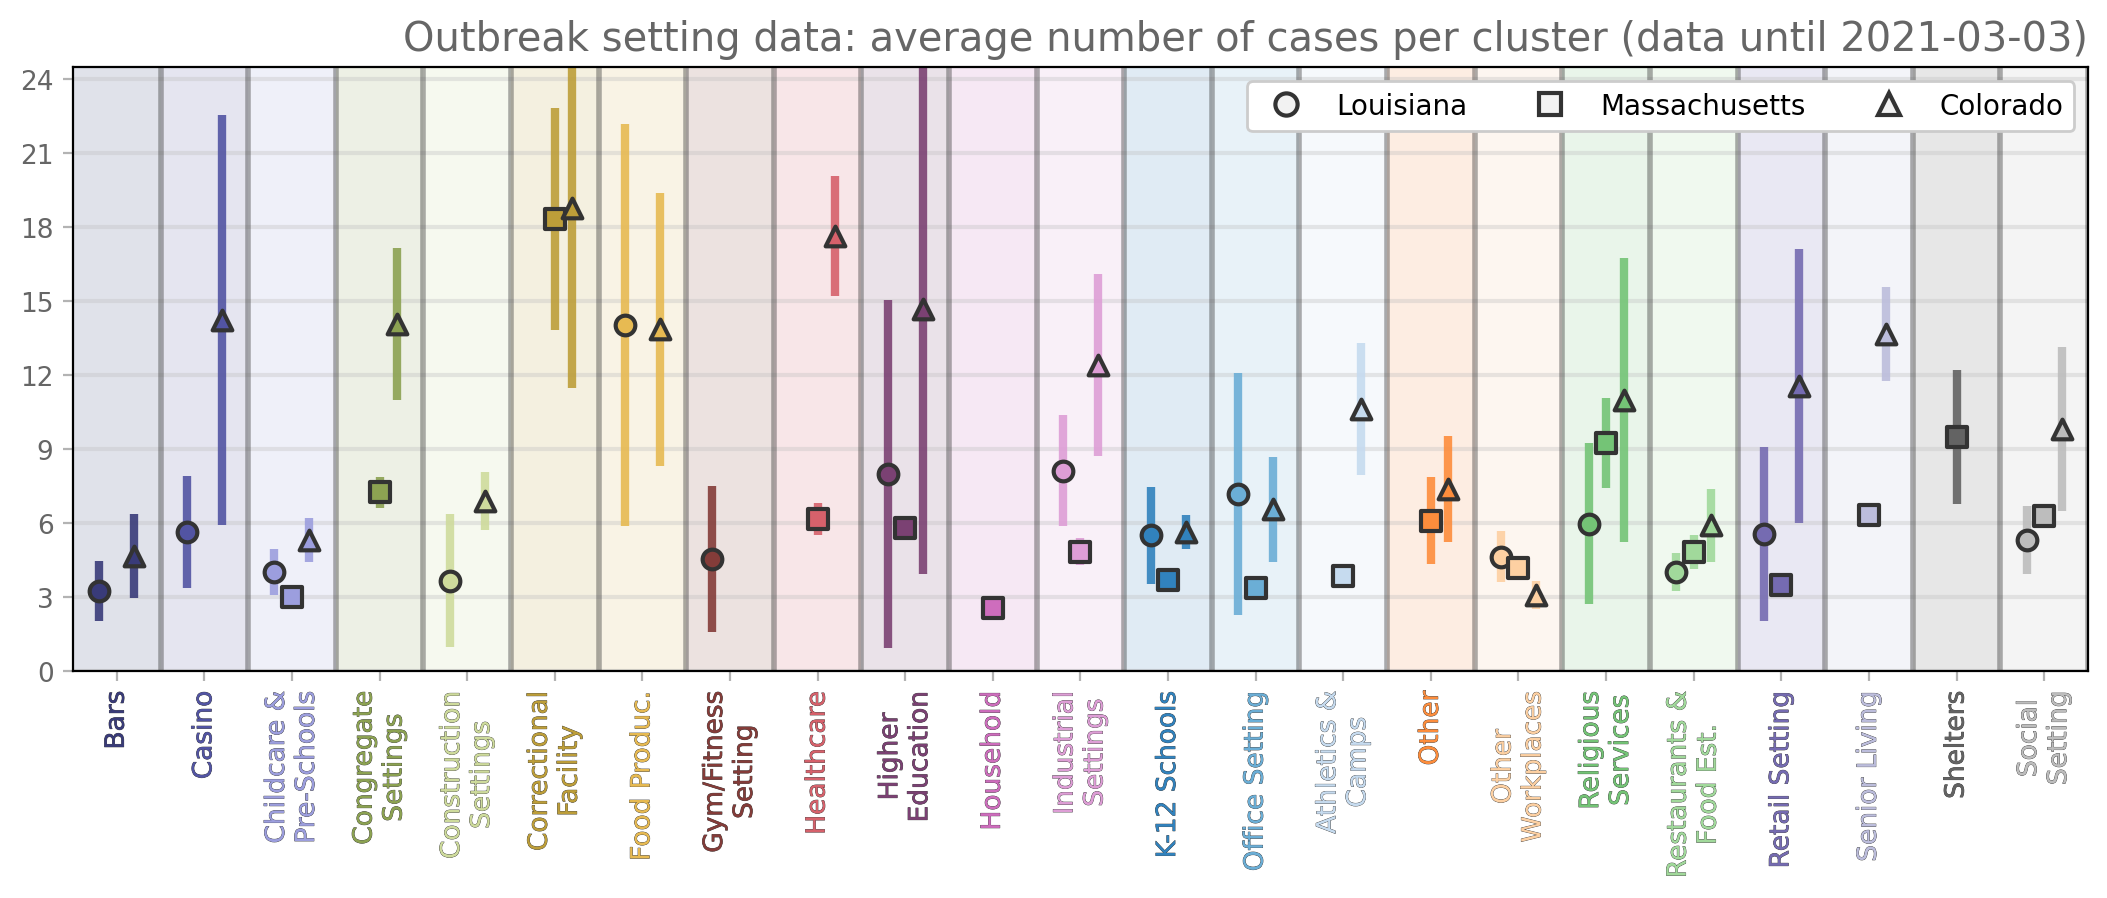

In [14]:
fig, ax = plt.subplots(1,1,figsize=(13,4), dpi=200)

cols = list(plt.cm.tab20b(np.linspace(0,1,12)))
cols = cols + list(plt.cm.tab20c(np.linspace(0,1,12)))
labs = dict(zip(['Bars', 'Casino', 'Childcare & Pre-Schools', 'Congregate Settings',
                 'Construction Settings', 'Correctional Facility', 'Food Production Facility',
                 'Gym/Fitness Setting', 'Healthcare', 'Higher Education', 'Household',
                 'Industrial Settings', 'K-12 Schools', 'Office Setting', 'Organized Athletics/Camps',
                 'Other', 'Other Workplaces', 'Religious Services/Event',
                 'Restaurants & Other Food Establishments', 'Retail Setting', 'Senior Living',
                 'Shelters', 'Social/Community Setting', 'Travel/Transit'],
                ['Bars', 'Casino', 'Childcare &\nPre-Schools', 'Congregate\nSettings',
                 'Construction\nSettings', 'Correctional\nFacility', 'Food Produc.',
                 'Gym/Fitness\nSetting', 'Healthcare', 'Higher\nEducation', 'Household',
                 'Industrial\nSettings', 'K-12 Schools', 'Office Setting', 'Athletics &\nCamps',
                 'Other', 'Other\nWorkplaces', 'Religious\nServices',
                 'Restaurants &\nFood Est.', 'Retail Setting', 'Senior Living',
                 'Shelters', 'Social\nSetting', 'Travel/Transit']))

marks = {'Massachusetts':'s','Louisiana':'o','Colorado':'^'}
xvsl = [-0.2, 0.0, 0.2]

for si,st in enumerate(out_dfg['state'].unique()):
    out_dfg_st = out_dfg.loc[out_dfg['state']==st].copy()
    dat_i = get_ci(out_dfg_st, 'new_cases_per', gb_col='grouped_setting', percentile='90')
    for oi, ou in enumerate(sorted(out_dfg['grouped_setting'].unique())[:-1]):
        out_dfg_st = out_dfg.loc[out_dfg['state']==st].copy()
        if ou in ['Organized Athletics/Camps','Casino','Higher Education','Travel/Transit','Correctional Facility','Healthcare','Senior Living','Congregate Settings']:
            if st == 'Colorado' and ou in ['Higher Education','Correctional Facility']:
                out_dfg_st['raw_new_clusters'] = out_dfg_st['raw_new_clusters'] * 5
                if ou == 'Higher Education':
                    out_dfg_st['raw_new_clusters'] = out_dfg_st['raw_new_clusters'] * 1.5
                out_dfg_st['new_cases_per'] = out_dfg_st['raw_new_cases']/out_dfg_st['raw_new_clusters']
            elif st == 'Colorado' and ou in ['Casino','Healthcare', 'Senior Living','Congregate Settings']:
                out_dfg_st['raw_new_clusters'] = out_dfg_st['raw_new_clusters'] * 1.5
                out_dfg_st['new_cases_per'] = out_dfg_st['raw_new_cases']/out_dfg_st['raw_new_clusters']

            dat_i = get_ci(out_dfg_st, 'new_cases_per', gb_col='grouped_setting', percentile='80')
        else:
            dat_i = get_ci(out_dfg_st, 'new_cases_per', gb_col='grouped_setting', percentile='95')            

        d = dat_i.loc[dat_i['grouped_setting']==ou].copy()
        ax.fill_between([oi-0.5, oi+0.5], 0, 25, lw=0, alpha=0.05, color=cols[oi], zorder=0)
        m = marks[out_dfg_st['state'].unique()[0]]
        if d.shape[0]>0:
            ax.vlines(oi+xvsl[si], d['ci95_lo'].values[0], d['ci95_hi'].values[0],
                      lw=3, alpha=0.9, color=cols[oi],zorder=1)
            ax.scatter([oi+xvsl[si]], [d['nanmean'].values[0]],
                       marker=m, ec='.2', color=cols[oi],zorder=2, lw=1.5, s=50)

ax.vlines(np.arange(0.5, 24, 1), 0, 25, color='.2', lw=2, alpha=0.4)
ax.tick_params(labelcolor='.4',color='.7',labelsize=9.5)
ax.set_xticks(list(range(out_dfg['grouped_setting'].nunique())))
ax.set_xlim(-0.5, out_dfg['grouped_setting'].nunique()-1.5)
ax.set_xticklabels([labs[i] for i in sorted(out_dfg['grouped_setting'].unique())],rotation=90)
for oi, ou in enumerate(sorted(out_dfg['grouped_setting'].unique())[:-1]):
    ax.get_xticklabels()[oi].set_color(cols[oi])
    ax.get_xticklabels()[oi].set_path_effects(path_effects=[path_effects.Stroke(linewidth=0.25,
                                            foreground='.2'), path_effects.Normal()])
    
ax.yaxis.set_major_locator(MaxNLocator(integer=True, nbins=9))

ax.grid(axis='y',linewidth=1.5,color='.75',alpha=0.35)
ax.set_ylim(0, 24.5)

from matplotlib.lines import Line2D
 
legend_elements = [Line2D([0], [0], marker='o', lw=0, color='.2', label='Louisiana',
                          markerfacecolor='.95', markersize=8, markeredgewidth=1.5),
                   Line2D([0], [0], marker='s', lw=0, color='.2', label='Massachusetts',
                          markerfacecolor='.95', markersize=8, markeredgewidth=1.5),
                   Line2D([0], [0], marker='^', lw=0, color='.2', label='Colorado',
                          markerfacecolor='.95', markersize=8, markeredgewidth=1.5)]

ax.legend(handles=legend_elements, loc=1, framealpha=1.0, fontsize='medium', ncol=3)

ax.set_title('Outbreak setting data: average number of cases per cluster '+\
             '(data until %s)'%outbreak_df['date'].max(),
             ha='right', x=1, color='.4', fontsize='x-large')


# plt.savefig('../figs/pngs/outbreaks_ma_la.png',dpi=425,bbox_inches='tight')
plt.show()

____________________________________

In [15]:
# use creds to create a client to interact with the Google Drive API
scope = ['https://spreadsheets.google.com/feeds',
         'https://www.googleapis.com/auth/drive']

creds = ServiceAccountCredentials.from_json_keyfile_name('../client_secret.json', scope)
client = gspread.authorize(creds)

florida_schools = client.open("COVID-data_FloridaSchools")
fl_data = florida_schools.worksheet('florida_schools')
fl_df = pd.DataFrame(fl_data.get_all_records(default_blank=np.nan))
fl_df['school'] = fl_df['school'].str.replace('. ','.',regex=False)
fl_df['school'] = fl_df['school'].str.replace('.',' ',regex=False)
fl_df['school'] = fl_df['school'].str.replace("'","",regex=False)
fl_df.loc[(~fl_df['school'].str.contains('TOUSSAINT')),
          'school'] = fl_df.loc[(~fl_df['school'].str.contains('TOUSSAINT')),
                                                 'school'].str.replace("SAINT ","ST ",regex=False)

gbcols = ['school','county','type','date','start_date']
agcols = ['new_cases','new_cases_students','new_cases_teachers','new_cases_staff','new_cases_unknown',
          'cumulative_cases','cumulative_cases_students','cumulative_cases_teachers',
          'cumulative_cases_staff','cumulative_cases_unknown','symptoms_yes','symptoms_no','symptoms_idk']

school_dfs = []
startdate_df = fl_df[['date','start_date']].drop_duplicates().sort_values('date').reset_index().iloc[:,1:]

school_counties = fl_df[['school','county','type']].drop_duplicates()

for i in list(school_counties.index):
    sch = school_counties['school'][i]
    cou = school_counties['county'][i]
    k12 = school_counties['type'][i]
#     print(sch)

    start_df = DATE_DF.loc[DATE_DF['date'].isin(sorted(fl_df['date'].unique()))][['date','week']]
    start_df = start_df.reset_index().iloc[:,1:]
    start_df = start_df.merge(startdate_df, how='left', on='date')

    fl_df_i = fl_df.loc[(fl_df['school']==sch)&(fl_df['county']==cou)].copy().reset_index().iloc[:,1:]
    fl_df_i = fl_df_i[[i for i in fl_df_i.columns if i != 'start_date']]
    
    odf = start_df.merge(fl_df_i, how='left', on='date')
    odf['school'] = sch.title()
    odf['county'] = cou.title()
    odf['type'] = k12
    odf = odf[gbcols+agcols]

    school_dfs.append(odf)

school_dfs = pd.concat(school_dfs).reset_index().iloc[:,1:]
school_dfs

,school,county,type,date,start_date,new_cases,new_cases_students,new_cases_teachers,new_cases_staff,new_cases_unknown,cumulative_cases,cumulative_cases_students,cumulative_cases_teachers,cumulative_cases_staff,cumulative_cases_unknown,symptoms_yes,symptoms_no,symptoms_idk
0,A L Mebane Middle,Alachua,k12,2020-09-26,2020-09-20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,A L Mebane Middle,Alachua,k12,2020-10-03,2020-09-27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,A L Mebane Middle,Alachua,k12,2020-10-17,2020-10-11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,A L Mebane Middle,Alachua,k12,2020-10-24,2020-10-18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,A L Mebane Middle,Alachua,k12,2020-10-31,2020-10-25,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116550,Washington District Office,Washington,k12,2021-01-16,2021-01-10,NaN,NaN,NaN,NaN,NaN,6.0,0.0,0.0,3.0,3.0,6.0,0.0,0.0
116551,Washington District Office,Washington,k12,2021-01-23,2021-01-17,1.0,0.0,0.0,1.0,0.0,7.0,0.0,0.0,4.0,3.0,7.0,0.0,0.0
116552,Washington District Office,Washington,k12,2021-01-30,2021-01-24,NaN,NaN,NaN,NaN,NaN,7.0,0.0,0.0,4.0,3.0,7.0,0.0,0.0
116553,Washington District Office,Washington,k12,2021-02-06,2021-01-31,NaN,NaN,NaN,NaN,NaN,7.0,0.0,0.0,4.0,3.0,7.0,0.0,0.0


In [16]:
school_dfs.loc[school_dfs['symptoms_yes']=='###','symptoms_yes'] = school_dfs.loc[school_dfs['symptoms_yes']=='###']['cumulative_cases'].astype(float)-\
                                                    school_dfs.loc[school_dfs['symptoms_yes']=='###']['symptoms_no'].astype(float) - \
                                                    school_dfs.loc[school_dfs['symptoms_yes']=='###']['symptoms_idk'].astype(float)

In [17]:
fl_df_g = school_dfs.groupby(gbcols).agg({i:np.nansum for i in agcols}).reset_index()

In [18]:
test = fl_df_g.groupby(['type','date']).agg({i:'sum' for i in agcols}).reset_index()

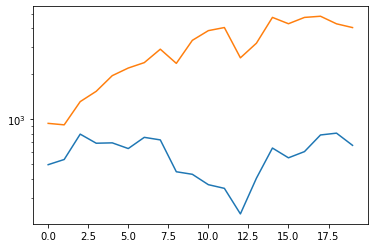

In [19]:
plt.semilogy(test.loc[test['type']=='university']['new_cases'].values)
plt.semilogy(test.loc[test['type']=='k12']['new_cases'].values)

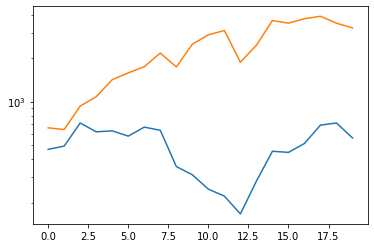

In [20]:
plt.semilogy(test.loc[test['type']=='university']['new_cases_students'].values)
plt.semilogy(test.loc[test['type']=='k12']['new_cases_students'].values)

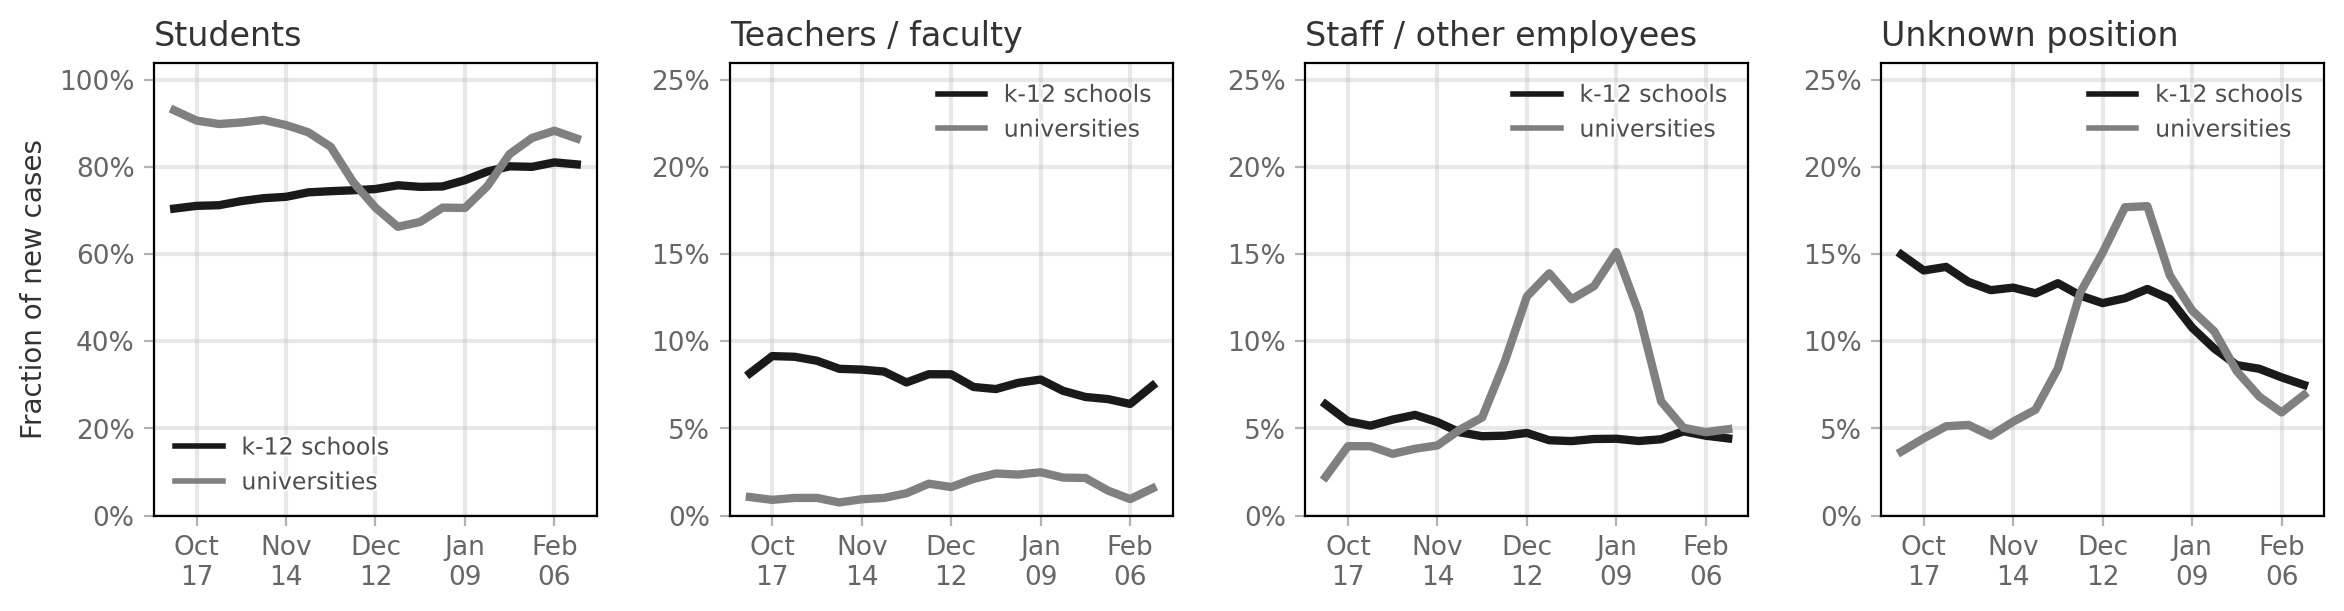

In [21]:
fig, ax = plt.subplots(1,4,figsize=(14,3),dpi=200)#, sharey=True)
plt.subplots_adjust(wspace=0.3)

lw = 3
cols = ['.5','.1']

ax[0].plot(test.loc[test['type']=='k12']['new_cases_students'].rolling(window=2).mean().values/\
             test.loc[test['type']=='k12']['new_cases'].rolling(window=2).mean().values,
           color=cols[1], label='k-12 schools', lw=lw)
ax[0].plot(test.loc[test['type']=='university']['new_cases_students'].rolling(window=2).mean().values/\
           test.loc[test['type']=='university']['new_cases'].rolling(window=2).mean().values,
           color=cols[0], label='universities', lw=lw)

ax[1].plot(test.loc[test['type']=='k12']['new_cases_teachers'].rolling(window=2).mean().values/\
             test.loc[test['type']=='k12']['new_cases'].rolling(window=2).mean().values,
           color=cols[1], label='k-12 schools', lw=lw)
ax[1].plot(test.loc[test['type']=='university']['new_cases_teachers'].rolling(window=2).mean().values/\
             test.loc[test['type']=='university']['new_cases'].rolling(window=2).mean().values,
           color=cols[0], label='universities', lw=lw)

ax[2].plot(test.loc[test['type']=='k12']['new_cases_staff'].rolling(window=2).mean().values/\
             test.loc[test['type']=='k12']['new_cases'].rolling(window=2).mean().values,
           color=cols[1], label='k-12 schools', lw=lw)
ax[2].plot(test.loc[test['type']=='university']['new_cases_staff'].rolling(window=2).mean().values/\
             test.loc[test['type']=='university']['new_cases'].rolling(window=2).mean().values,
           color=cols[0], label='universities', lw=lw)

ax[3].plot(test.loc[test['type']=='k12']['new_cases_unknown'].rolling(window=2).mean().values/\
             test.loc[test['type']=='k12']['new_cases'].rolling(window=2).mean().values,
           color=cols[1], label='k-12 schools', lw=lw)
ax[3].plot(test.loc[test['type']=='university']['new_cases_unknown'].rolling(window=2).mean().values/\
             test.loc[test['type']=='university']['new_cases'].rolling(window=2).mean().values,
           color=cols[0], label='universities', lw=lw)

ax[0].set_ylabel('Fraction of new cases', color='.2')
ax[0].set_title('Students', x=0, ha='left', color='.2')
ax[1].set_title('Teachers / faculty', x=0, ha='left', color='.2')
ax[2].set_title('Staff / other employees', x=0, ha='left', color='.2')
ax[3].set_title('Unknown position', x=0, ha='left', color='.2')

dates = test['date'].unique()
for ai, a in enumerate(fig.axes):
    leg = a.legend(fontsize=8.5, markerscale=0.5, framealpha=0)
    leg.get_lines()[0].set_linewidth(lw/1.5)
    leg.get_lines()[1].set_linewidth(lw/1.5)
    for text in leg.get_texts():
        text.set_color('.3')
        text.set_path_effects([path_effects.Stroke(linewidth=1.5, foreground='w'),
                               path_effects.Normal()])

    if ai == 0:
        a.set_yticks(np.linspace(0,1,6))
        a.set_yticklabels(['0%','20%','40%','60%','80%','100%'])
        a.set_ylim(0,1.04)
    else:
        a.set_yticks(np.linspace(0,0.25,6))
        a.set_yticklabels(['0%','5%','10%','15%','20%','25%'])
        a.set_ylim(0, 0.26)

    a.tick_params(labelcolor='.4',color='.7',labelsize=9.5)
    a.grid(linewidth=1.5,color='.75',alpha=0.35)
    a.set_xticks(list(range(len(dates)))[2::4])
    a.set_xticklabels([month_dict[i[5:7]]+"\n"+i[8:] for i in sorted(dates)[2::4]])
#     a.set_xlim(-0.5, out_dfg['grouped_setting'].nunique()-1.5)

plt.show()

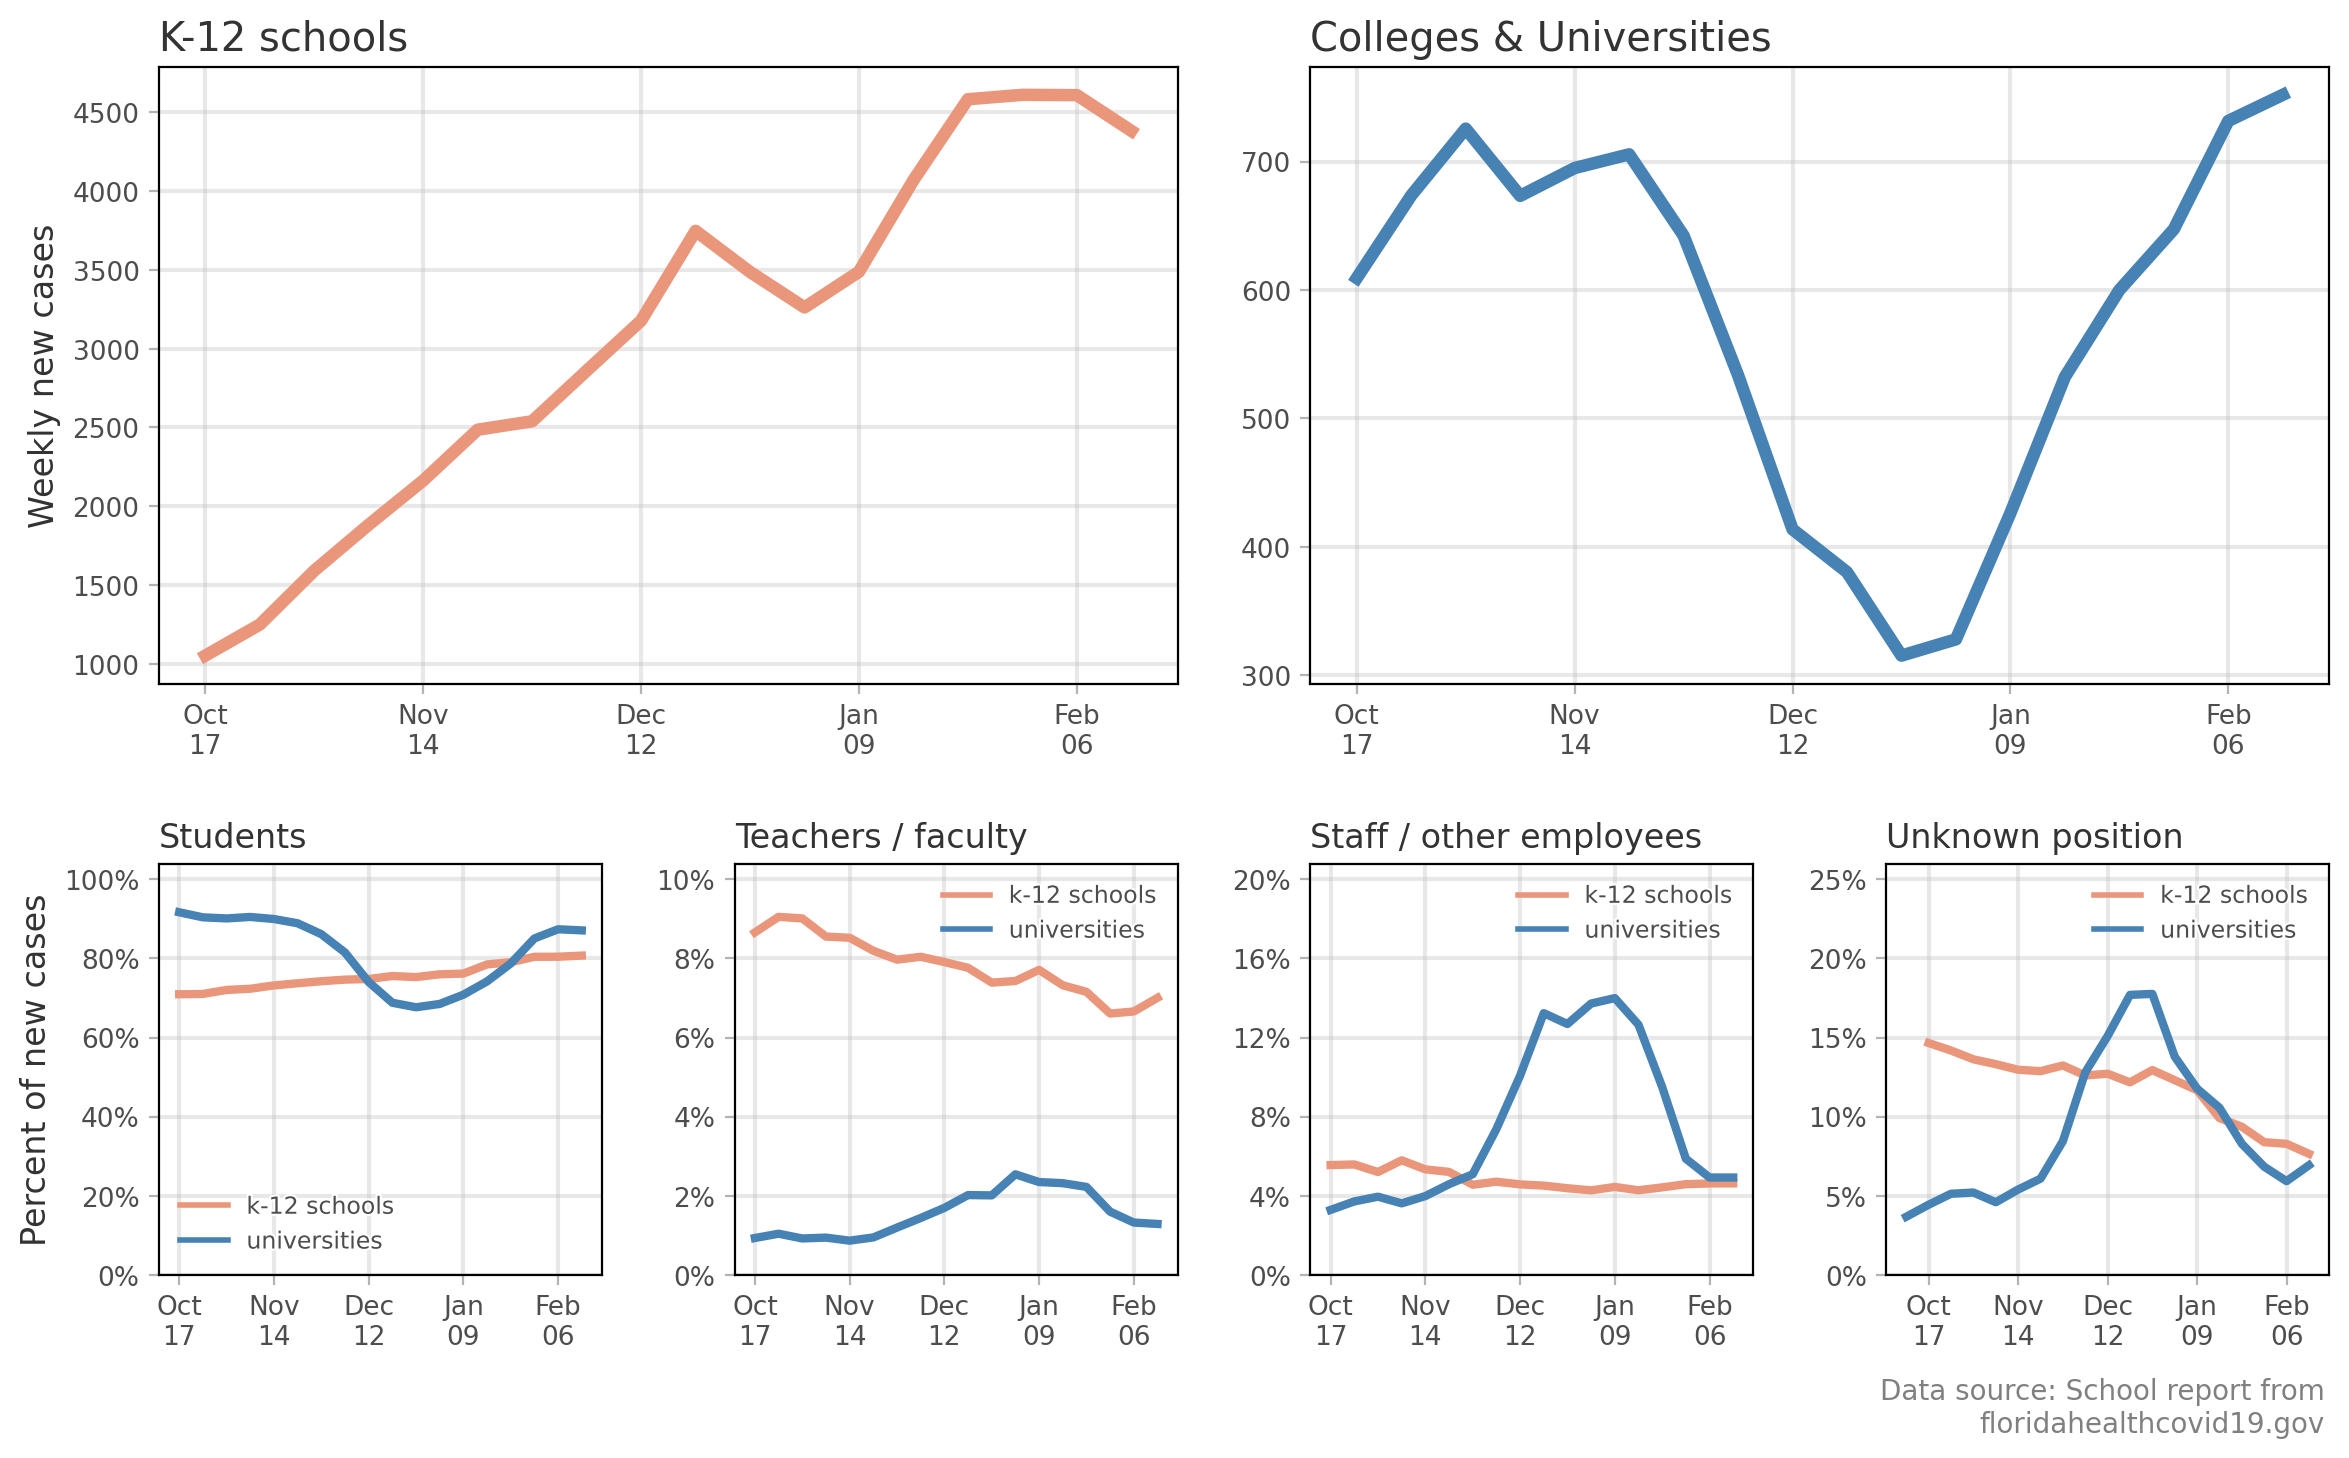

In [22]:
fig, ax = plt.subplots(2,4,figsize=(14,8),dpi=200,gridspec_kw={'height_ratios':[3,2]})
plt.subplots_adjust(wspace=0.3,hspace=0.35)

lw = 3
cols = ['steelblue','darksalmon']
wid = 3

gs = ax[0, 0].get_gridspec()
for a in ax[0:1, 0:1].flatten():
    a.remove()
axbig1 = fig.add_subplot(gs[0:1, 0:2])
for a in ax[0:1, 2:3].flatten():
    a.remove()
axbig2 = fig.add_subplot(gs[0:1, 2:4])

axbig1.plot(test.loc[test['type']=='k12']['new_cases'].rolling(window=wid).mean().values,
           color=cols[1], lw=lw*1.5)
axbig2.plot(test.loc[test['type']=='university']['new_cases'].rolling(window=wid).mean().values,
           color=cols[0], lw=lw*1.5)

ax[(1,0)].plot(test.loc[test['type']=='k12']['new_cases_students'].rolling(window=wid).mean().values/\
             test.loc[test['type']=='k12']['new_cases'].rolling(window=wid).mean().values,
           color=cols[1], label='k-12 schools', lw=lw)
ax[(1,0)].plot(test.loc[test['type']=='university']['new_cases_students'].rolling(window=wid).mean().values/\
           test.loc[test['type']=='university']['new_cases'].rolling(window=wid).mean().values,
           color=cols[0], label='universities', lw=lw)

ax[(1,1)].plot(test.loc[test['type']=='k12']['new_cases_teachers'].rolling(window=wid).mean().values/\
             test.loc[test['type']=='k12']['new_cases'].rolling(window=wid).mean().values,
           color=cols[1], label='k-12 schools', lw=lw)
ax[(1,1)].plot(test.loc[test['type']=='university']['new_cases_teachers'].rolling(window=wid).mean().values/\
             test.loc[test['type']=='university']['new_cases'].rolling(window=wid).mean().values,
           color=cols[0], label='universities', lw=lw)

ax[(1,2)].plot(test.loc[test['type']=='k12']['new_cases_staff'].rolling(window=wid).mean().values/\
             test.loc[test['type']=='k12']['new_cases'].rolling(window=wid).mean().values,
           color=cols[1], label='k-12 schools', lw=lw)
ax[(1,2)].plot(test.loc[test['type']=='university']['new_cases_staff'].rolling(window=wid).mean().values/\
             test.loc[test['type']=='university']['new_cases'].rolling(window=wid).mean().values,
           color=cols[0], label='universities', lw=lw)

ax[(1,3)].plot(test.loc[test['type']=='k12']['new_cases_unknown'].rolling(window=wid).mean().values/\
             test.loc[test['type']=='k12']['new_cases'].rolling(window=wid).mean().values,
           color=cols[1], label='k-12 schools', lw=lw)
ax[(1,3)].plot(test.loc[test['type']=='university']['new_cases_unknown'].rolling(window=2).mean().values/\
             test.loc[test['type']=='university']['new_cases'].rolling(window=2).mean().values,
           color=cols[0], label='universities', lw=lw)

axbig1.set_ylabel('Weekly new cases', color='.2', fontsize='large')
axbig1.set_title('K-12 schools', x=0, ha='left', color='.2', fontsize='x-large')
axbig2.set_title('Colleges & Universities', x=0, ha='left', color='.2', fontsize='x-large')

ax[(1,0)].set_ylabel('Percent of new cases', color='.2', fontsize='large')
ax[(1,0)].set_title('Students', x=0, ha='left', color='.2')
ax[(1,1)].set_title('Teachers / faculty', x=0, ha='left', color='.2')
ax[(1,2)].set_title('Staff / other employees', x=0, ha='left', color='.2')
ax[(1,3)].set_title('Unknown position', x=0, ha='left', color='.2')

ax[(1,3)].text(0.99,-0.25, 'Data source: School report from'+\
               '\nfloridahealthcovid19.gov',transform=ax[(1,3)].transAxes,
               va='top', ha='right', color='.5')

rr = -1
dates = test['date'].unique()
for ai, a in enumerate(fig.axes):
    a.tick_params(labelcolor='.3',color='.7',labelsize=9.5)
    a.grid(linewidth=1.5,color='.75',alpha=0.35)
    a.set_xticks(list(range(len(dates)))[2::4])
    a.set_xticklabels([month_dict[i[5:7]]+"\n"+i[8:] for i in sorted(dates)[2::4]])
    if ai <= 1:
        a.set_axis_off()

    else:
        if ai < 6:
            rr += 1
            leg = a.legend(fontsize=8.5, markerscale=0.5, framealpha=0)
            leg.get_lines()[0].set_linewidth(lw/1.5)
            leg.get_lines()[1].set_linewidth(lw/1.5)
            for text in leg.get_texts():
                text.set_color('.3')
                text.set_path_effects([path_effects.Stroke(linewidth=1.5, foreground='w'),
                                       path_effects.Normal()])

            if rr == 0:
                a.set_yticks(np.linspace(0,1,6))
                a.set_yticklabels(['0%','20%','40%','60%','80%','100%'])
                a.set_ylim(0,1.04)
            elif rr == 1:
                a.set_yticks(np.linspace(0,.1,6))
                a.set_yticklabels(['0%','2%','4%','6%','8%','10%'])
                a.set_ylim(0,0.104)
            elif rr == 2:
                a.set_yticks(np.linspace(0,.2,6))
                a.set_yticklabels(['0%','4%','8%','12%','16%','20%'])
                a.set_ylim(0,0.208)
            else:
                a.set_yticks(np.linspace(0,0.25,6))
                a.set_yticklabels(['0%','5%','10%','15%','20%','25%'])
                a.set_ylim(0, 0.26)

# plt.savefig('../figs/pngs/florida_schools.png',dpi=425,bbox_inches='tight')

plt.show()

In [23]:
# https://docs.google.com/spreadsheets/d/1_tuAo5oDr3UEL9KiYoaIzfP3tb7hE2IAorSrzZjdbyE/edit?usp=sharing

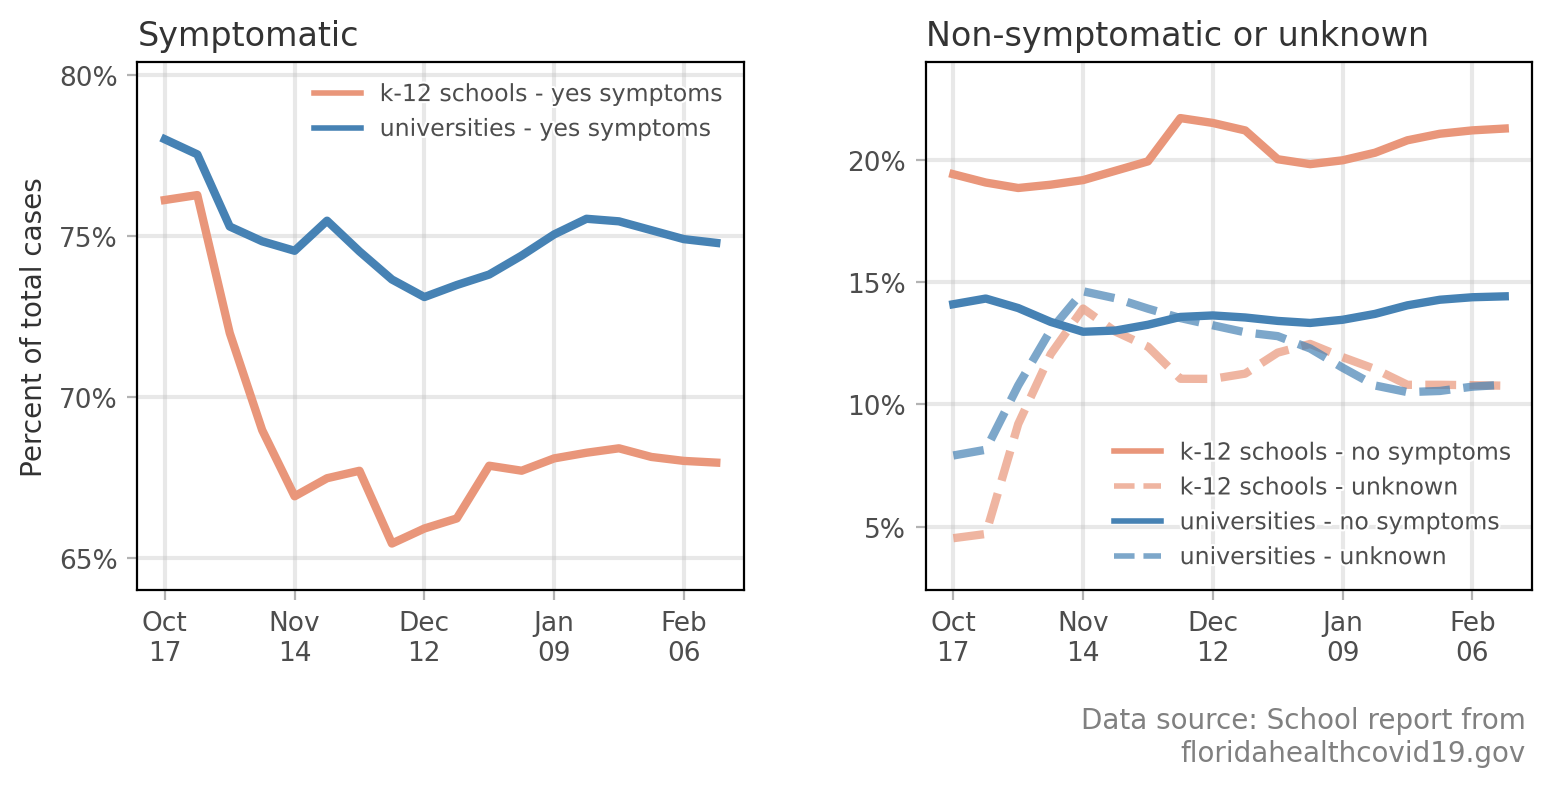

In [24]:
wid = 3
fig, ax = plt.subplots(1,2,figsize=(9,3.5),dpi=200)
plt.subplots_adjust(wspace=0.3)

ax[0].plot(test.loc[test['type']=='k12']['symptoms_yes'].rolling(window=wid).mean().values/\
             test.loc[test['type']=='k12']['cumulative_cases'].rolling(window=wid).mean().values,
           color=cols[1], label='k-12 schools - yes symptoms', lw=lw, linestyle='-')
ax[1].plot(test.loc[test['type']=='k12']['symptoms_no'].rolling(window=wid).mean().values/\
             test.loc[test['type']=='k12']['cumulative_cases'].rolling(window=wid).mean().values,
           color=cols[1], label='k-12 schools - no symptoms', lw=lw, linestyle='-')
ax[1].plot(test.loc[test['type']=='k12']['symptoms_idk'].rolling(window=wid).mean().values/\
             test.loc[test['type']=='k12']['cumulative_cases'].rolling(window=wid).mean().values,
           color=cols[1], label='k-12 schools - unknown', lw=lw, linestyle='--', alpha=0.7)

ax[0].plot(test.loc[test['type']=='university']['symptoms_yes'].rolling(window=wid).mean().values/\
             test.loc[test['type']=='university']['cumulative_cases'].rolling(window=wid).mean().values,
           color=cols[0], label='universities - yes symptoms', lw=lw, linestyle='-')
ax[1].plot(test.loc[test['type']=='university']['symptoms_no'].rolling(window=wid).mean().values/\
             test.loc[test['type']=='university']['cumulative_cases'].rolling(window=wid).mean().values,
           color=cols[0], label='universities - no symptoms', lw=lw, linestyle='-')
ax[1].plot(test.loc[test['type']=='university']['symptoms_idk'].rolling(window=wid).mean().values/\
             test.loc[test['type']=='university']['cumulative_cases'].rolling(window=wid).mean().values,
           color=cols[0], label='universities - unknown', lw=lw, linestyle='--', alpha=0.7)

# plt.ylim(0, 0.25)
dates = test['date'].unique()
for ai, a in enumerate(fig.axes):
    a.tick_params(labelcolor='.3',color='.7',labelsize=9.5)
    a.grid(linewidth=1.5,color='.75',alpha=0.35)
    a.set_xticks(list(range(len(dates)))[2::4])
    a.set_xticklabels([month_dict[i[5:7]]+"\n"+i[8:] for i in sorted(dates)[2::4]])
    leg = a.legend(fontsize=8.5, markerscale=0.5, framealpha=0)
    for line in leg.get_lines():
        line.set_linewidth(lw/1.5)

    for text in leg.get_texts():
        text.set_color('.3')
        text.set_path_effects([path_effects.Stroke(linewidth=1.5, foreground='w'),
                               path_effects.Normal()])

    if ai == 0:
        a.set_yticks(np.linspace(0.65,0.8,4))
        a.set_yticklabels(['65%','70%','75%','80%'])
        a.set_ylim(0.64,0.804)
    elif ai == 1:
        a.set_yticks(np.linspace(0.05,0.25,5))
        a.set_yticklabels(['5%','10%','15%','20%','25%'])
        a.set_ylim(0.024,0.24)


ax[0].set_ylabel('Percent of total cases', color='.2')
ax[0].set_title('Symptomatic', x=0, ha='left', color='.2')
ax[1].set_title('Non-symptomatic or unknown', x=0, ha='left', color='.2')
ax[-1].text(0.99,-0.22, 'Data source: School report from'+\
               '\nfloridahealthcovid19.gov',transform=ax[-1].transAxes,
               va='top', ha='right', color='.5')

# plt.savefig('../figs/pngs/florida_schools_symptoms.png',dpi=425,bbox_inches='tight')

plt.show()

In [25]:
# fl_df_g.to_csv('../data/florida_schools.csv',index=False)

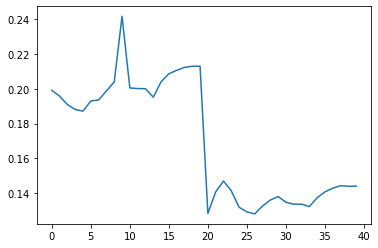

In [26]:
plt.plot(test['symptoms_no'] / test['cumulative_cases'])